In [1]:
import torch
import numpy as np
import torchvision
import pandas as pd
import seaborn as sn
import torch.nn as nn
from PIL import Image
from pathlib import Path
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Read csv

In [2]:
#read the csv
#column Breed shows the y with the image name
data_csv = pd.read_csv('dataset_CV.csv')
data_csv

,DogId,Breed,Image,ImageNumber
0,6673,SIBERIAN HUSKY,4d924d95-de4c-43c0-a586-9fb19cadf905.jpg,1
1,6673,SIBERIAN HUSKY,851cc9ee-fc4d-430c-99f6-6425b8bbbe6b.jpg,2
2,6673,SIBERIAN HUSKY,7d055dfa-dc6f-4f2b-a7be-dc8bc666836f.jpg,3
3,6673,SIBERIAN HUSKY,f1f55f0a-c3d6-442b-b686-71b83b510dc5.jpg,4
4,6671,SIBERIAN HUSKY,a2e49a61-7c6a-46f0-a80e-9f32e596c1df.jpg,1
...,...,...,...,...
4139,38513,BORDER COLLIE,e3957a7c-9289-4441-bdbd-d2289bef745d.jpg,5
4140,38513,BORDER COLLIE,48afd0ab-baf2-4ee8-9584-9563cec529e7.jpg,6
4141,38513,BORDER COLLIE,8f8c4ea0-7426-4188-bb6c-94fa1ecb1e33.jpg,7
4142,38513,BORDER COLLIE,cce5499f-eb04-4d8c-8d3f-c9c9bee16c5c.jpg,8


# Preprocessing

In [3]:
# setting transforms to use on images
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
    transforms.Resize((80, 80)),
    ])

In [4]:
location = r"dog_breed_photos"

# prepare the image by setting to RGB and applying the transforms (return tensor)
def create_data(path):
    image = Image.open(Path(location) / path).convert('RGB')
    img = trans(image)
    image.close()
    return img

# prepare the label and turn to tensor
def create_label(label):
    if label == "AMERICAN STAFFORDSHIRE BULL TERRIER":
        y = 0
    elif label == "BULL ARAB":
        y = 1
    elif label == "GERMAN SHEPHERD":
        y = 2
    elif label == "SIBERIAN HUSKY":
        y = 3
    elif label == "BORDER COLLIE":
        y = 4
    return torch.tensor(y)
    

data_csv['data'] = data_csv['Image'].apply(lambda image: create_data(image))
data_csv['class'] = data_csv['Breed'].apply(lambda breed: create_label(breed))
data_csv

,DogId,Breed,Image,ImageNumber,data,class
0,6673,SIBERIAN HUSKY,4d924d95-de4c-43c0-a586-9fb19cadf905.jpg,1,"[[[tensor(-0.1844), tensor(0.0981), tensor(-0....",tensor(3)
1,6673,SIBERIAN HUSKY,851cc9ee-fc4d-430c-99f6-6425b8bbbe6b.jpg,2,"[[[tensor(-0.4873), tensor(-0.0569), tensor(-0...",tensor(3)
2,6673,SIBERIAN HUSKY,7d055dfa-dc6f-4f2b-a7be-dc8bc666836f.jpg,3,"[[[tensor(0.1891), tensor(0.3586), tensor(0.42...",tensor(3)
3,6673,SIBERIAN HUSKY,f1f55f0a-c3d6-442b-b686-71b83b510dc5.jpg,4,"[[[tensor(0.4161), tensor(0.5646), tensor(-0.0...",tensor(3)
4,6671,SIBERIAN HUSKY,a2e49a61-7c6a-46f0-a80e-9f32e596c1df.jpg,1,"[[[tensor(-0.8325), tensor(-0.5639), tensor(-0...",tensor(3)
...,...,...,...,...,...,...
4139,38513,BORDER COLLIE,e3957a7c-9289-4441-bdbd-d2289bef745d.jpg,5,"[[[tensor(-0.7552), tensor(-0.7529), tensor(-0...",tensor(4)
4140,38513,BORDER COLLIE,48afd0ab-baf2-4ee8-9584-9563cec529e7.jpg,6,"[[[tensor(-0.9216), tensor(-0.8598), tensor(-0...",tensor(4)
4141,38513,BORDER COLLIE,8f8c4ea0-7426-4188-bb6c-94fa1ecb1e33.jpg,7,"[[[tensor(-0.2863), tensor(-0.6980), tensor(-0...",tensor(4)
4142,38513,BORDER COLLIE,cce5499f-eb04-4d8c-8d3f-c9c9bee16c5c.jpg,8,"[[[tensor(0.5186), tensor(0.7422), tensor(0.20...",tensor(4)


In [5]:
#create dataframe for loader
df = pd.concat([data_csv['data'], data_csv['class']], ignore_index=True, axis = 1)
df

,0,1
0,"[[[tensor(-0.1844), tensor(0.0981), tensor(-0....",tensor(3)
1,"[[[tensor(-0.4873), tensor(-0.0569), tensor(-0...",tensor(3)
2,"[[[tensor(0.1891), tensor(0.3586), tensor(0.42...",tensor(3)
3,"[[[tensor(0.4161), tensor(0.5646), tensor(-0.0...",tensor(3)
4,"[[[tensor(-0.8325), tensor(-0.5639), tensor(-0...",tensor(3)
...,...,...
4139,"[[[tensor(-0.7552), tensor(-0.7529), tensor(-0...",tensor(4)
4140,"[[[tensor(-0.9216), tensor(-0.8598), tensor(-0...",tensor(4)
4141,"[[[tensor(-0.2863), tensor(-0.6980), tensor(-0...",tensor(4)
4142,"[[[tensor(0.5186), tensor(0.7422), tensor(0.20...",tensor(4)


In [6]:
# transform to campatible datatype
df_dict = df.to_dict('index')
print(type(df_dict))
df_dict

<class 'dict'>


{0: {0: tensor([[[-0.1844,  0.0981, -0.1456,  ...,  0.2879,  0.1251,  0.1206],
           [-0.2976, -0.1580,  0.5647,  ...,  0.2784,  0.3170,  0.1521],
           [-0.0527,  0.2661,  0.2105,  ...,  0.3134,  0.3041, -0.0613],
           ...,
           [ 0.0999, -0.0438,  0.8984,  ..., -0.2107, -0.4613, -0.6314],
           [-0.2400,  0.0082,  0.2577,  ...,  0.1920, -0.4047, -0.8381],
           [-0.2278,  0.3041,  0.2783,  ..., -0.6604, -0.5640, -0.3309]],
  
          [[-0.2512,  0.0132, -0.2554,  ...,  0.2957,  0.1301,  0.1285],
           [-0.3668, -0.2428,  0.4471,  ...,  0.2860,  0.2664,  0.1350],
           [-0.1893,  0.1602,  0.1203,  ...,  0.3369,  0.2791, -0.2165],
           ...,
           [ 0.0167, -0.2360,  0.8118,  ...,  0.2080,  0.1448, -0.2610],
           [-0.3317, -0.1911,  0.1013,  ...,  0.3768,  0.2389, -0.7351],
           [-0.3173,  0.1251,  0.0908,  ..., -0.7121, -0.1924, -0.0491]],
  
          [[-0.3109, -0.0089, -0.2789,  ...,  0.3349,  0.1693,  0.1677],
     

# Train - Test Split and Dataloader

In [7]:
# train, test split
train, test = train_test_split(df_dict, test_size = 0.25, random_state=42, shuffle = True)
train

[{0: tensor([[[ 0.3333,  0.3412,  0.2902,  ...,  0.5549,  0.6039,  0.5804],
           [ 0.3353,  0.3431,  0.3686,  ...,  0.5275,  0.2000,  0.4235],
           [ 0.2980,  0.3412,  0.3137,  ...,  0.4627,  0.4569,  0.4098],
           ...,
           [-0.5059, -0.5196, -0.5333,  ..., -0.0255, -0.0078,  0.0020],
           [-0.5569, -0.5608, -0.5490,  ...,  0.0235,  0.0137,  0.0176],
           [-0.4882, -0.5059, -0.5137,  ...,  0.0157,  0.0451,  0.0569]],
  
          [[ 0.0510,  0.0549,  0.0157,  ...,  0.3333,  0.4078,  0.3471],
           [ 0.0314,  0.0510,  0.0627,  ...,  0.2588, -0.0235,  0.1765],
           [-0.0078,  0.0196,  0.0314,  ...,  0.2784,  0.2627,  0.2235],
           ...,
           [-0.3294, -0.3431, -0.3569,  ...,  0.0608,  0.0706,  0.0804],
           [-0.3765, -0.3804, -0.3686,  ...,  0.0706,  0.0686,  0.0765],
           [-0.2843, -0.3020, -0.3098,  ...,  0.0392,  0.0647,  0.0608]],
  
          [[-0.6745, -0.6706, -0.6843,  ..., -0.3314, -0.2275, -0.3314],
        

In [8]:
#dataloader
train_loader = torch.utils.data.DataLoader(train, batch_size= 2, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size= 1, shuffle=True)

# Define cnn model

In [9]:
#Define model

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Conv2d(3, 6, (3,3)),
        nn.ReLU(),
        nn.Conv2d(6, 12, (3,3), padding=1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(73008, 5),
        )

    def forward(self, x):
        return self.model(x)


model = Net()
print(model)

Net(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=73008, out_features=5, bias=True)
  )
)


In [10]:
# loss function and optimezer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training

In [11]:
max_epochs = 10
train_losses = []

for epoch in range(max_epochs): 
    train_loss = 0
    for i, data in enumerate(train_loader):
        
        inputs = data[0] 
        labels = data[1]
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        
    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch: {epoch + 1}/{max_epochs} Loss: {train_loss :.5f}')
    train_losses.append(train_loss)


print('Finished Training')

Epoch: 1/10 Loss: 1.57025
Epoch: 2/10 Loss: 1.38261
Epoch: 3/10 Loss: 0.82375
Epoch: 4/10 Loss: 0.22450
Epoch: 5/10 Loss: 0.08958
Epoch: 6/10 Loss: 0.03268
Epoch: 7/10 Loss: 0.02407
Epoch: 8/10 Loss: 0.02131
Epoch: 9/10 Loss: 0.01946
Epoch: 10/10 Loss: 0.00780
Finished Training


## Explenation to loss values

CrossEntropyLoss does not have an upper bound, which is why the loss values of the first epochs are over 1.
This tells us that our model is still very bad in these epochs of training. 
The links bellow helped us understand and interpret these values.

https://stackoverflow.com/questions/35013822/log-loss-output-is-greater-than-1
https://www.folkstalk.com/2022/10/tensorflow-binary-cross-entropy-loss-with-code-examples.html

# Evaluating

In [13]:
#eval
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        
        inputs = data[0] 
        labels = data[1]
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 37.16216216216216 %


# Plotting

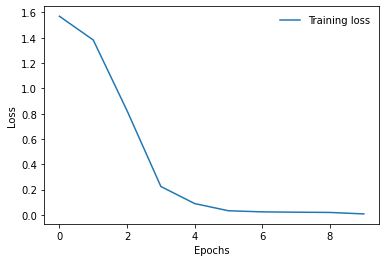

In [14]:
#visualize
plt.plot(train_losses, label='Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

<AxesSubplot:>

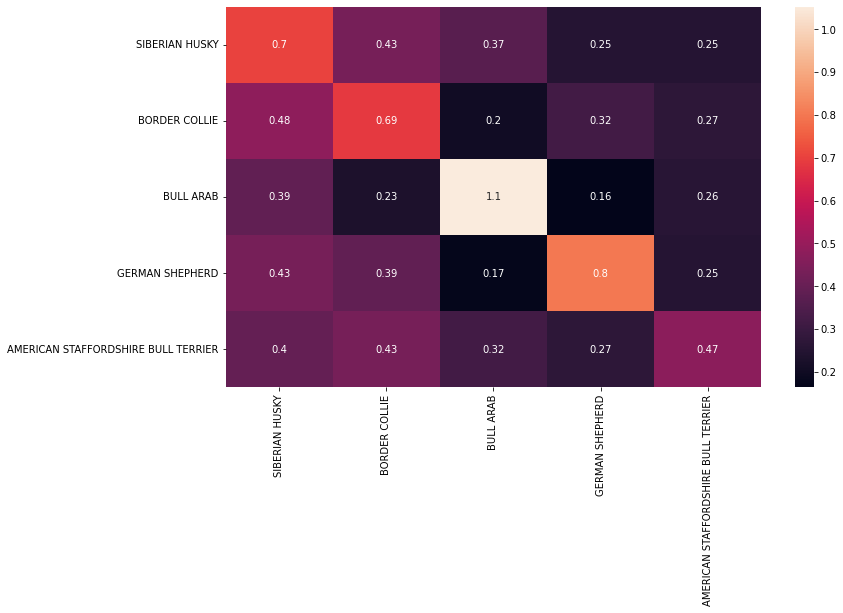

In [15]:
#confussion matrix
y_pred = []
y_true = []

for data in test_loader:
    inputs = data[0] 
    labels = data[1]
    outputs = model(inputs)

    output = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
    y_pred.extend(output)
        
    labels = labels.data.cpu().numpy()
    y_true.extend(labels)

classes = ('SIBERIAN HUSKY', 'BORDER COLLIE', 'BULL ARAB', 'GERMAN SHEPHERD', 'AMERICAN STAFFORDSHIRE BULL TERRIER')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
#plt.savefig('output.png')